## Linear Regression
As in the previous notebook, first we need to input all the packages we need.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets,linear_model

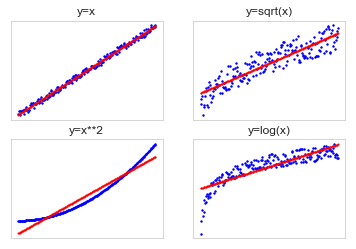

In [54]:
def original(x):
	return x

def square(x):
	return x*x

def change_func(N,func,noise_factor,title,i):
	data_x = np.arange(1,N).reshape(-1,1) # Generate an array with values from 0 to N
	rdm = (np.random.rand(N-1)-0.5).reshape(-1,1) # Random noise generator. rand(N) returns N random numbers between 0 and 1
	data_y1 = (func(data_x) + rdm*noise_factor)  # different function wrt x, with noise
	# Create and train linear regression model 
	regr = linear_model.LinearRegression()
	regr.fit(data_x,data_y1)
	predicted_y = regr.predict(data_x)
	plt.subplot(2,2,i)
	plt.title(title)
	plt.scatter(data_x,data_y1,color="b",s=2)
	plt.scatter(data_x,predicted_y,color="r",s=1)
	plt.xticks([]), plt.yticks([])

N=200
plt.figure(1)
change_func(N,original,15,"y=x",1)
change_func(N,np.sqrt,5,"y=sqrt(x)",2)
change_func(N,square,20,"y=x**2",3)
change_func(N,np.log,1,"y=log(x)",4)
plt.show()

#### Reading Datasets

In order to perform machine learning, we typically need a significant amount of data. By understanding the data, analysing patterns and training our algorithms, we can achieve meaningful results. Scikit-learn makes it easy for us to access some pre-defined 'toy' datasets to practice our understanding.

In this example, we'll use the "diabetes" dataset, which contains records for 442 diabetes patients. The 10 features in the dataset represent each patient's age, sex, body mass index, average blood pressure, and six blood serum measurements. The response of interest is a quantitative measure of disease progression one year after baseline. We'll use this to find a regression to predict a patient's disease progression based on any of their features.

Read through the code below to understand how this particular data is structured. Later, we'll apply a linear regression to the data, but some features will be better suited to this than others. Try to find which feature has the most linear relationship to the target.

### Data Exploration
First, we input the datset of diabetes

In [58]:
# load the diabetes dataset
diabetes = datasets.load_diabetes()
data=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
target=pd.DataFrame(diabetes.target,columns=["target"])
df=pd.concat([data,target],axis=1)
df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5   -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6   -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7    0.063504  0.050680 -0.001895  0.066630  0.090620  0.108914  0.022869   
8    0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9   -0.070900 -0.044642  0.039062 -0.033214 -0.012577 -0.034508 -0.024993   
10  -0.096328 -0.044642 -0.083808  0.008101 -0.103389 -0.090561 -0.013948   
11   0.027178  0.050680  0.017506 -0.033214 -0.007073  0.045972 -0.065491   
12   0.016281 -0.044642 -0.028840 -0.009113 -0.004321 -0.009769  0.044958   
13   0.005383  0.050680 -0.001895  0.008101 -0.004321 -0.015719 -0.002903   
14   0.045341 -0.044642 -0.025607 -0.012556  0.017694 -0.000061  0.081775   
15  -0.052738  0.050680 -0.018062  0.080401  0.089244  0.107662 -0.039719   
16  -0.005515 -0.044642  0.042296  0.049415  0.024574 -0.023861  0.074412   
17   0.070769  0.050680  0.012117  0.056301  0.034206  0.049416 -0.039719   
18  -0.038207 -0.044642 -0.010517 -0.036656 -0.037344 -0.019476 -0.028674   
19  -0.027310 -0.044642 -0.018062 -0.040099 -0.002945 -0.011335  0.037595   
20  -0.049105 -0.044642 -0.056863 -0.043542 -0.045599 -0.043276  0.000779   
21  -0.085430  0.050680 -0.022373  0.001215 -0.037344 -0.026366  0.015505   
22  -0.085430 -0.044642 -0.004050 -0.009113 -0.002945  0.007767  0.022869   
23   0.045341  0.050680  0.060618  0.031053  0.028702 -0.047347 -0.054446   
24  -0.063635 -0.044642  0.035829 -0.022885 -0.030464 -0.018850 -0.006584   
25  -0.067268  0.050680 -0.012673 -0.040099 -0.015328  0.004636 -0.058127   
26  -0.107226 -0.044642 -0.077342 -0.026328 -0.089630 -0.096198  0.026550   
27  -0.023677 -0.044642  0.059541 -0.040099 -0.042848 -0.043589  0.011824   
28   0.052606 -0.044642 -0.021295 -0.074528 -0.040096 -0.037639 -0.006584   
29   0.067136  0.050680 -0.006206  0.063187 -0.042848 -0.095885  0.052322   
..        ...       ...       ...       ...       ...       ...       ...   
412  0.074401 -0.044642  0.085408  0.063187  0.014942  0.013091  0.015505   
413 -0.052738 -0.044642 -0.000817 -0.026328  0.010815  0.007141  0.048640   
414  0.081666  0.050680  0.006728 -0.004523  0.109883  0.117056 -0.032356   
415 -0.005515 -0.044642  0.008883 -0.050428  0.025950  0.047224 -0.043401   
416 -0.027310 -0.044642  0.080019  0.098763 -0.002945  0.018101 -0.017629   
417 -0.052738 -0.044642  0.071397 -0.074528 -0.015328 -0.001314  0.004460   
418  0.009016 -0.044642 -0.024529 -0.026328  0.098876  0.094196  0.070730   
419 -0.020045 -0.044642 -0.054707 -0.053871 -0.066239 -0.057367  0.011824   
420  0.023546 -0.044642 -0.036385  0.000068  0.001183  0.034698 -0.043401   
421  0.038076  0.050680  0.016428  0.021872  0.039710  0.045032 -0.043401   
422 -0.078165  0.050680  0.077863  0.052858  0.078236  0.064447  0.026550   
423  0.009016  0.050680 -0.039618  0.028758  0.038334  0.073529 -0.072854   
424  0.001751  0.050680  0.011039 -0.019442 -0.016704 -0.003819 -0.047082   
425 -0.078165 -0.044642 -0.040696 -0.081414 -0.100638 -0.112795  0.022869   
426  0.030811  0.050680 -0.034229  0.043677  0.057597  0.068831 -0.032356   
427 -0.034575  0.050680  0.005650 -0.005671 -0.073119 -0.062691 -0.006584   
428  0.048974  0.050680  0.088642  0.087287  0.035582  0.021546 -0.024993   
429 -0.041840 -0.044642 -0.033151 -0.022885  0.046589  0.041587  0.056003   
430 -0.009147 -0.044642 -0.056863 -0.050428  0.021822  0.045345 -0.028674   
431  0.070769  0.050680 -0.030996  0.021872 -0.037344 -0.047034  0.033914   
432  0

Sometimes you need to see the data plotted out to understand more. Seaborn is a library which is a wrapper over Matplotlib (the standard Python library for data plotting) and is extremely convenient to use. For example, the below plot shows a box plot of target values of all records.

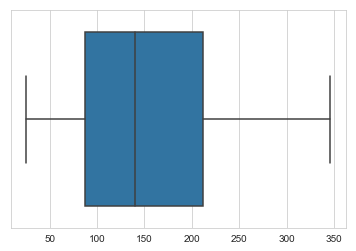

In [56]:
sns.set_style("whitegrid")
sns.boxplot(x=target) #Box plot
plt.show()

 Using Seaborn, plot a scatter plot between bmi and target value.

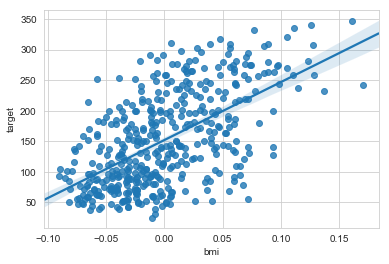

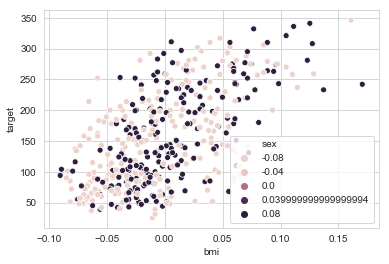

In [59]:
#TODO
sns.regplot(x='bmi',y='target',data=df)
plt.show()
sns.scatterplot(x='bmi',y='target',hue='sex',data=df)

Let's view the correlation heatmap for the different features for some more inspiration. 

[[ True  True  True  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True  True  True  True]
 [False False False  True  True  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True  True  True]
 [False False False False False  True  True  True  True  True  True]
 [False False False False False False  True  True  True  True  True]
 [False False False False False False False  True  True  True  True]
 [False False False False False False False False  True  True  True]
 [False False False False False False False False False  True  True]
 [False False False False False False False False False False  True]]


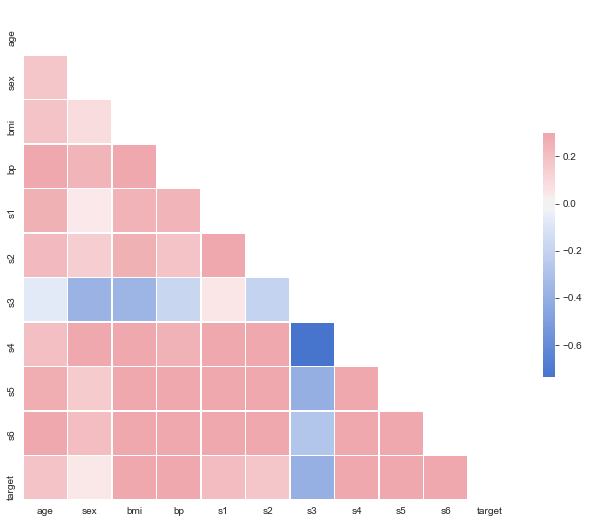

In [70]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
print(mask)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(256, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

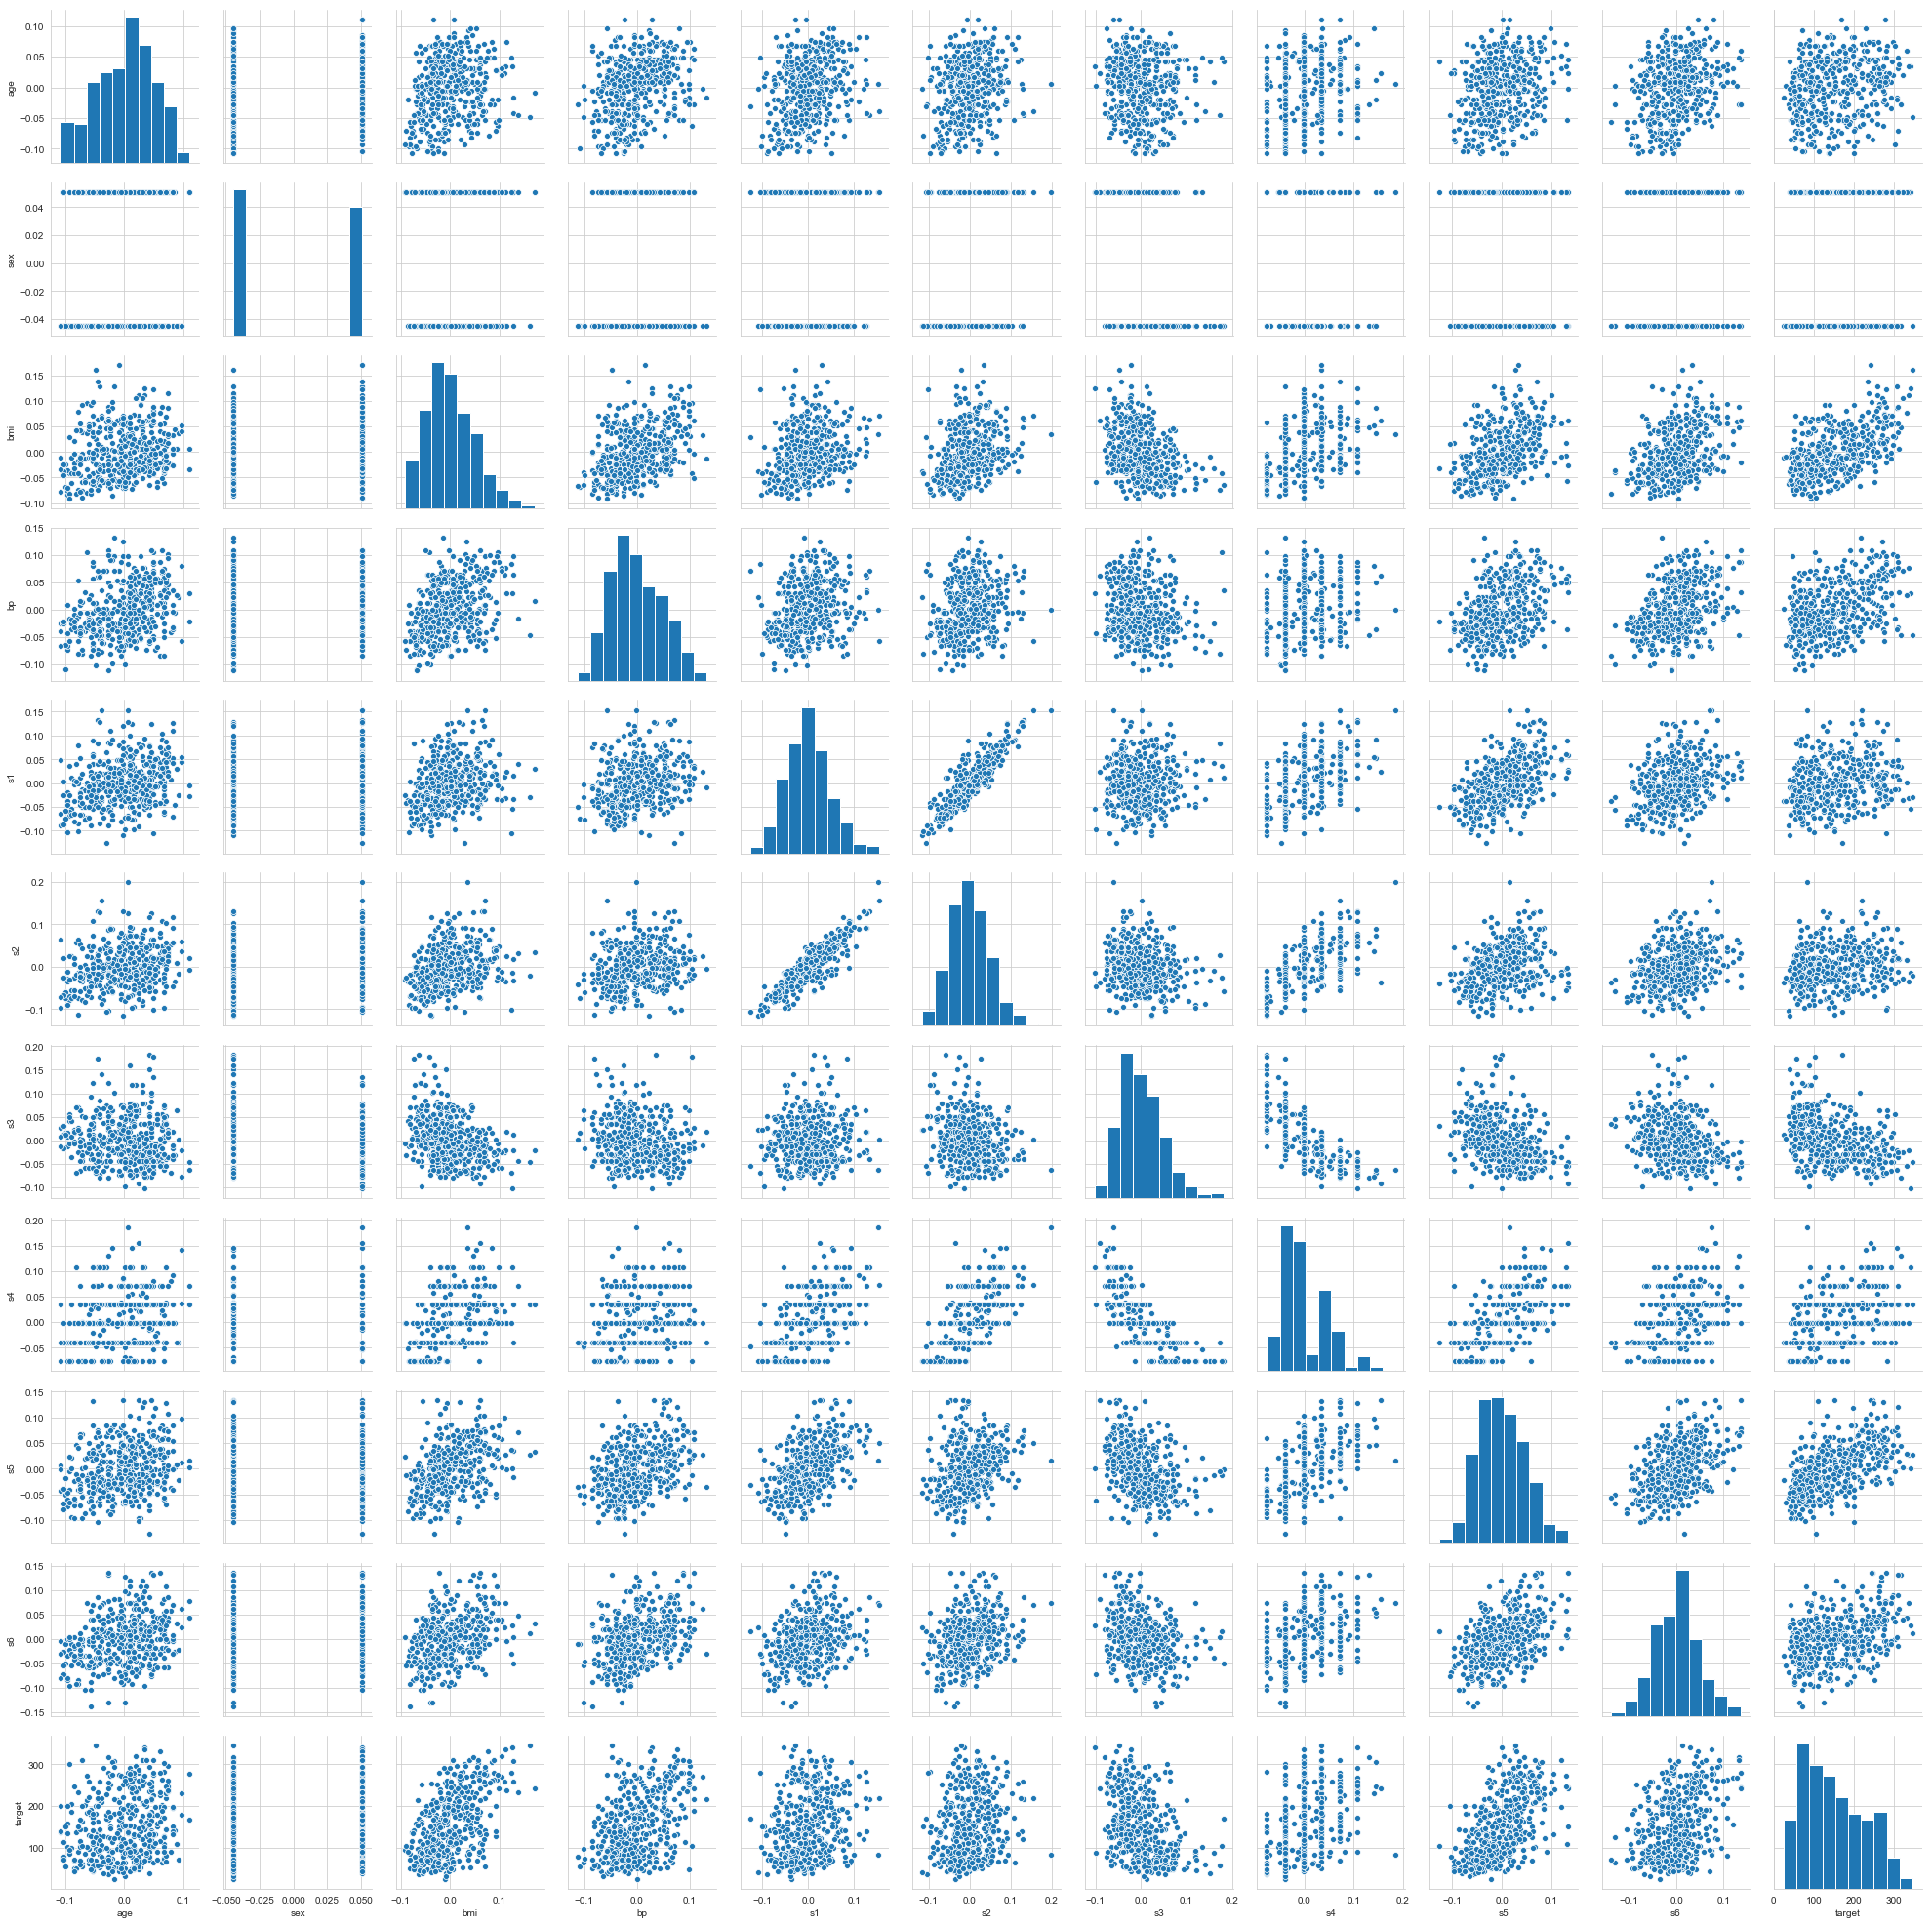

In [61]:
sns.pairplot(df)#
plt.show()

Now that we have a dataset loaded, and a feature of interest selected, we can try to fit a linear regression.  Scikit-learn has methods for accomplishing this very simply.  There are two steps involved:
1. Training the model: the linear regression model must be trained by supplying it with a sample feature set, and the corresponding targets.
2. Prediction: once the model is trained, you can provide it with a number of sample points and it will return its predicted targets.

After training the model, we can see the coefficients of the model; i.e., find the *regression coefficient* $a$ and the *intercept* $b$ in the (univariate) linear regression formula $y = ax + b$.
We can also calculate the mean squared error of the model points to give us something to compare models and feature choice.

Fill in the code necessary to load the dataset, train and visualise the linear regression.

Coefficients:  949.4352603839491 152.1334841628967
Mean squared error: 3890.46


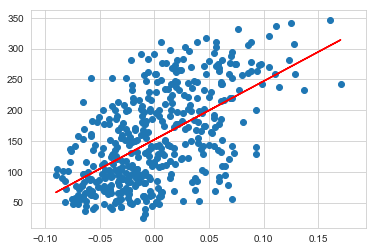

In [73]:
#load the diabetes dataset
diabetes = datasets.load_diabetes()
#Extract a single feature
fnum = 2 ## <-- Whichever feature you chose
data_x = diabetes.data[:,np.newaxis,fnum]
data_y = diabetes.target

#Create linear regression model
regr = linear_model.LinearRegression()
#Train the model
regr.fit(data_x,data_y)
#Predict the targets
predicted_y = regr.predict(data_x)

#Output the coefficient
print('Coefficients: ', regr.coef_[0], regr.intercept_)
#Calculate the Mean Squared Error
mse = np.mean((predicted_y - data_y) ** 2)
print ("Mean squared error: %.2f" % mse)

plt.scatter(data_x,data_y)
plt.plot(data_x,predicted_y,color="red")
plt.show()

If done correctly, you should end up with a linear regression (i.e. straight line) which approximately follows the shape of the scattered data, with an MSE under 4000. You can try using other features in the dataset to see how the linearity of the data affects the MSE.

### Test vs. Training set
Typically, we do not want to test our model on the data with which we trained it, as this will not provide an accurate assessment of the model.  However, we only have a limited amount of data to work with in this case.  One way around this issue is to split the data into a 'training set' and a much smaller 'test set'.  In this example, we'll take 20 data points out of the dataset to use as our test set, and leave the rest for training. 

Change the code below to use the test and training set rather than the dataset as a whole.  Note, the array indexing we use to extract the test set is provided by the Numpy module.

How is the mean squared error (MSE) affected when we check with the test set?  Why?
Try adjusting $N$ and see how the model accuracy is affected.

Coefficients:  1013.17358256885 153.4350903922729
Mean squared error: 3921.37


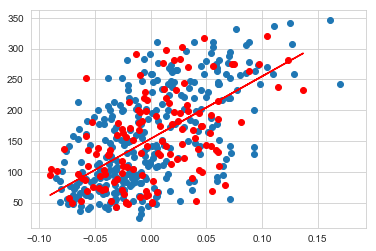

In [63]:
from sklearn.model_selection import train_test_split
#load the data
diabetes = datasets.load_diabetes()
fnum = 2 # selected by prior knowledge or the maximun correlations.
data_x = diabetes.data[:,np.newaxis,fnum]
data_y = diabetes.target

# split data
train_x, test_x, train_y, test_y = train_test_split(
    data_x, data_y, test_size=0.30, random_state=0)
#Create linear regression model
regr = linear_model.LinearRegression()
#Train the model
regr.fit(train_x,train_y)
#Predict the targets
predicted_y =regr.predict(test_x)

#Output the coefficient
print('Coefficients: ', regr.coef_[0], regr.intercept_)
#Calculate the Mean Squared Error
mse = np.mean((predicted_y - test_y) ** 2)
print ("Mean squared error: %.2f" % mse)

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y, color="red")
plt.plot(test_x,predicted_y,color="red")
plt.show()

Other kinds of measure for linear regression are used:

In [64]:
from sklearn.metrics import explained_variance_score,mean_squared_error,r2_score
def performance_metrics(y_true,y_pred):
    rmse = mean_squared_error(y_true,y_pred)
    r2 = r2_score(y_true,y_pred)
    explained_var_score = explained_variance_score(y_true,y_pred)
    return rmse,r2,explained_var_score

rmsa,r2,explained_var_score=performance_metrics(test_y,predicted_y)
print ("Root of mean squared error: %.2f" % rmsa)
print ("R2-score: %.2f" % r2)
print ("Explained variance score: %.2f" % explained_var_score)

Root of mean squared error: 3921.37
R2-score: 0.23
Explained variance score: 0.23


In [ ]:
#tut Q2

In [47]:
#X
X = np.array([[1,3],[1,6],[1,7],[1,8],[1,11]])
Y = np.array([[13,8,11,2,6]])
X_tran = X.transpose()
A = np.dot(X_tran,X)
A_inver = np.linalg.inv(A)

In [48]:
B = np.dot(X_tran,Y.ravel())

In [49]:
np.dot(A_inver,B)

array([15., -1.])

array([[13],
       [ 8],
       [11],
       [ 2],
       [ 6]])